<h1><center>Section - 3: Model Creation and Training</center></h1>

In this section we would be creating and training many different machine learning models starting from simpler ones such as Logistic Regression, K-Nearest Neighbors to more complex ones such as Random Forest Classifier as well as Deep Learning Neural Networks. 
So let's get started.

In [3]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the processed data
df=pd.read_csv('drive/MyDrive/processed_data.csv',index_col=0)
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_5113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


## Train Test Split

We would be splitting the entire dataset into a train portion and a test portion. This is an important step to prevent overfitting of the model and also we can accurately evaluate the performance of the model.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df.drop('loan_repaid',axis=1)   # all columns except the loan_repaid column
y=df['loan_repaid']

In [7]:
# splitting the dataset into 30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## General Function for all ML algorithms

In [8]:
'''
The function would include fitting the training data to the model, making predictions on the test data 
and further performing k-fold cross validation
'''

def classification_model(model,X_train,X_test,y_train,y_test):
    
    # fit the model on the training data
    model.fit(X_train,y_train)
    
    # making predictions on the test data
    predictions=model.predict(X_test)
    
    # printing the metrics
    print("The accuracy is: ",accuracy_score(y_test,predictions))
    print("\n")
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
    print("\n")
    
    # 10 fold cross validation
    kf_validation=KFold(n_splits=10,shuffle=True)
    scores=[]
    
    for k,(train,test) in enumerate(kf_validation.split(X_train,y_train)):
        model.fit(X_train.iloc[train,:],y_train.iloc[train])
        score=model.score(X_train.iloc[test,:],y_train.iloc[test])
        scores.append(score)
        print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
    
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

## Logistic Regression

In [11]:
pipe_lr=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression())
])

In [12]:
classification_model(pipe_lr,X_train,X_test,y_train,y_test)

The accuracy is:  0.88788522848034


              precision    recall  f1-score   support

           0       0.95      0.45      0.61     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

[[10568 12795]
 [  498 94705]]


Fold:  1, Accuracy: 0.889
Fold:  2, Accuracy: 0.888
Fold:  3, Accuracy: 0.888
Fold:  4, Accuracy: 0.890
Fold:  5, Accuracy: 0.890
Fold:  6, Accuracy: 0.893
Fold:  7, Accuracy: 0.889
Fold:  8, Accuracy: 0.890
Fold:  9, Accuracy: 0.890
Fold: 10, Accuracy: 0.887


Cross-Validation accuracy: 0.889 +/- 0.002


## K-Nearest Neighbor

In [13]:
pipe_knn=Pipeline([
    ('scaler',StandardScaler()),
    ('model',KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
])

In [14]:
classification_model(pipe_knn,X_train,X_test,y_train,y_test)

The accuracy is:  0.8696169222205354


              precision    recall  f1-score   support

           0       0.75      0.51      0.60     23363
           1       0.89      0.96      0.92     95203

    accuracy                           0.87    118566
   macro avg       0.82      0.73      0.76    118566
weighted avg       0.86      0.87      0.86    118566

[[11821 11542]
 [ 3917 91286]]


Fold:  1, Accuracy: 0.867
Fold:  2, Accuracy: 0.873
Fold:  3, Accuracy: 0.872
Fold:  4, Accuracy: 0.867
Fold:  5, Accuracy: 0.868
Fold:  6, Accuracy: 0.872
Fold:  7, Accuracy: 0.870
Fold:  8, Accuracy: 0.871
Fold:  9, Accuracy: 0.871
Fold: 10, Accuracy: 0.871


Cross-Validation accuracy: 0.870 +/- 0.002


## Random Forest Classifier

In [17]:
pipe_rfc=Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(n_estimators=500,n_jobs=-1,verbose=1))
])

In [18]:
classification_model(pipe_rfc,X_train,X_test,y_train,y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    5.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   11.7s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   13.1s finished


The accuracy is:  0.8878683602381796


              precision    recall  f1-score   support

           0       0.97      0.45      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.92      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

[[10397 12966]
 [  329 94874]]




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.9s finished


Fold:  1, Accuracy: 0.890


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.9s finished


Fold:  2, Accuracy: 0.889


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.9s finished


Fold:  3, Accuracy: 0.889


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    3.0s finished


Fold:  4, Accuracy: 0.888


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    3.0s finished


Fold:  5, Accuracy: 0.888


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.9s finished


Fold:  6, Accuracy: 0.891


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.9s finished


Fold:  7, Accuracy: 0.892


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.9s finished


Fold:  8, Accuracy: 0.886


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    2.8s finished


Fold:  9, Accuracy: 0.890


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    2.7s


Fold: 10, Accuracy: 0.889


Cross-Validation accuracy: 0.889 +/- 0.002


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    3.0s finished


## Deep Neural Network

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
len(X_train.columns)

75

In [30]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Here we would be training a sequential deep learning neural network model. The layers would be of the form 80 ---> 40 ---> 20 ---> 10 ---> 1. The number of neurons is based on the number of features in the data which in this case is 75. Additionally we would be using dropout layers and early stopping to prevent overfitting the data.**

In [36]:
model = Sequential()

model.add(Dense(80,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))

# output layer 
model.add(Dense(1,activation='sigmoid'))

# compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=3,mode='min')

In [38]:
model.fit(x=X_train_scaled,y=y_train,validation_data=(X_test_scaled,y_test),epochs=60,callbacks=[early_stop])

Epoch 1/60
8646/8646 [==============================] - 80s 9ms/step - loss: 0.3059 - accuracy: 0.8748 - val_loss: 0.2659 - val_accuracy: 0.8869
Epoch 2/60
8646/8646 [==============================] - 76s 9ms/step - loss: 0.2715 - accuracy: 0.8844 - val_loss: 0.2677 - val_accuracy: 0.8869
Epoch 3/60
8646/8646 [==============================] - 77s 9ms/step - loss: 0.2686 - accuracy: 0.8848 - val_loss: 0.2689 - val_accuracy: 0.8869
Epoch 4/60
8646/8646 [==============================] - 81s 9ms/step - loss: 0.2677 - accuracy: 0.8851 - val_loss: 0.2674 - val_accuracy: 0.8869
Epoch 5/60
8646/8646 [==============================] - 77s 9ms/step - loss: 0.2672 - accuracy: 0.8851 - val_loss: 0.2637 - val_accuracy: 0.8869
Epoch 6/60
8646/8646 [==============================] - 81s 9ms/step - loss: 0.2675 - accuracy: 0.8849 - val_loss: 0.2615 - val_accuracy: 0.8869
Epoch 7/60
8646/8646 [==============================] - 79s 9ms/step - loss: 0.2664 - accuracy: 0.8851 - val_loss: 0.2619 - val_ac

In [39]:
# saving the model
model.save('loan_default_classification.h5')

### Evaluating the performance

In [40]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.305887,0.874764,0.265920,0.886941
1,0.271452,0.884393,0.267675,0.886932
2,0.268563,0.884802,0.268895,0.886932
3,0.267735,0.885058,0.267448,0.886932
4,0.267200,0.885076,0.263658,0.886941


<AxesSubplot:>

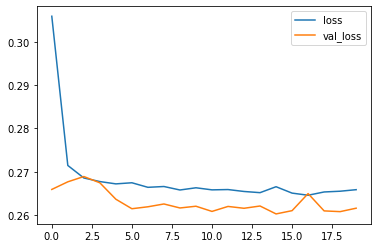

In [41]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

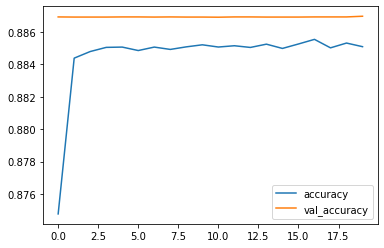

In [42]:
losses[['accuracy','val_accuracy']].plot()

In [43]:
predictions=model.predict(X_test_scaled)

In [44]:
predictions

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.        ],
       [0.6453951 ],
       [0.70444757]], dtype=float32)

**Predictions contains the probability for each class. We need to round the probabilities to get the class.**

In [49]:
for i in range(len(predictions)):
    predictions[i][0]=int(round(predictions[i][0]))

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566



In [51]:
print(confusion_matrix(y_test,predictions))

[[ 9990 13373]
 [   27 95176]]


In [52]:
accuracy_score(y_test,predictions)

0.8869827775247542

**We created 4 different models starting from logistic regression, K-nearest neighbors, random forest and finally neural network. The accuracy of the models was almost similar in the range of about 86% to 89%.**